___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [2]:
import os

# Set TF log level to ignore INFOs
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras


import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [4]:
import tensorflow as tf

if tf.config.list_physical_devices("GPU"):
    print("GPU support is enabled for this session.")
else:
    print("CPU will be used for this session.")

GPU support is enabled for this session.


# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [5]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [6]:
print("There are ", len(x_train), "images in the training dataset")
print("There are ", len(x_test), "images in the test dataset")

There are  60000 images in the training dataset
There are  10000 images in the test dataset


**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [7]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [8]:
# Checking the shape of one image
x_train[0].shape

(28, 28)

In [9]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

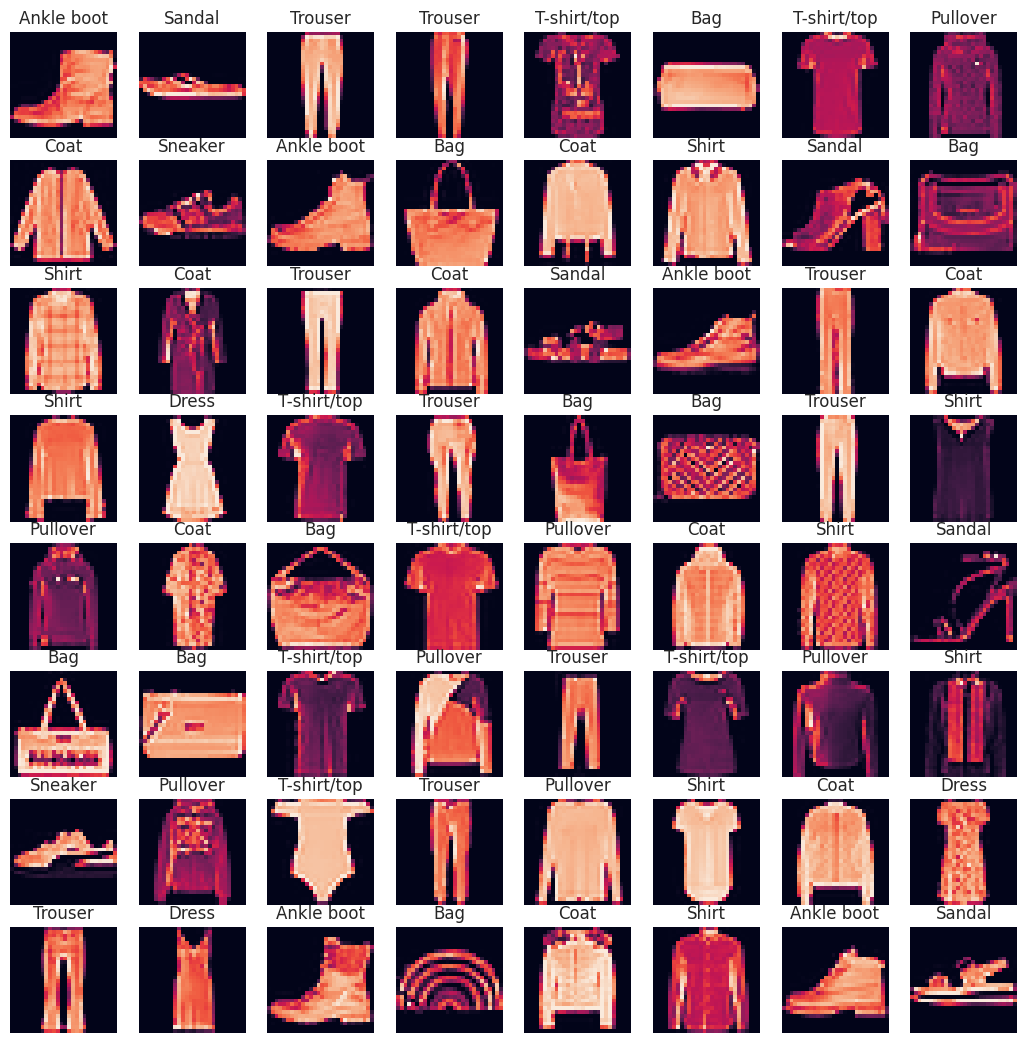

In [10]:
fig, axes = plt.subplots(8, 8)
fig.set_size_inches(13, 13)
for ax in axes.flatten():
    rand_index = int(np.random.randint(low=0, high=50000, size=1))
    ax.axis("off")
    ax.set_title(classes[int(y_train[rand_index])])
    ax.imshow(x_train[rand_index])
plt.show()

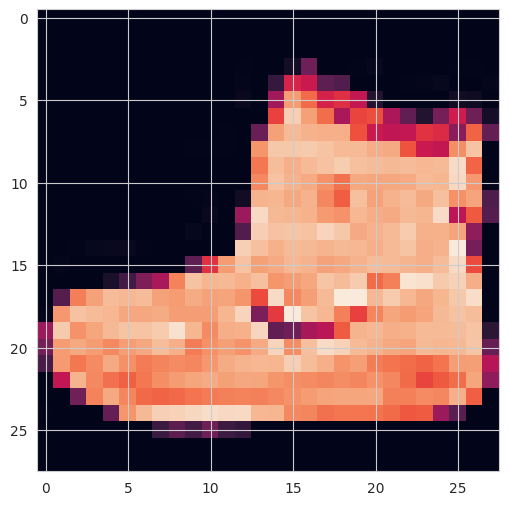

In [11]:
plt.imshow(x_train[0])

In [12]:
y_train


array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [13]:
y_train[0]


9

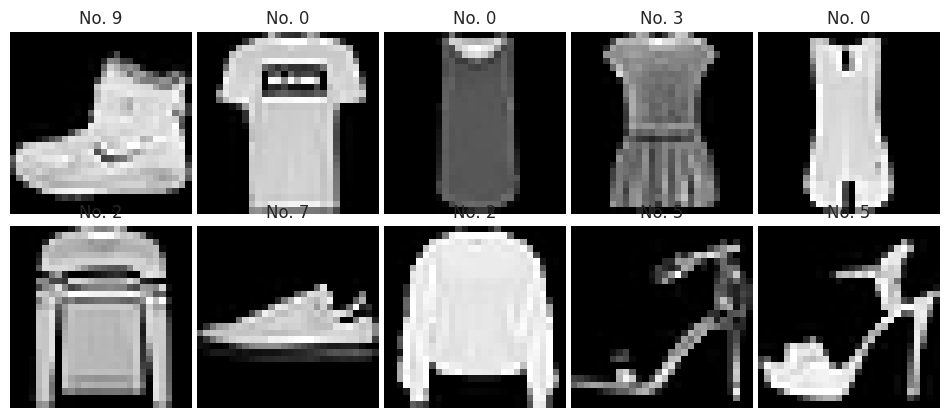

In [14]:
num_rows, num_cols = 2, 5
f, ax = plt.subplots(2, 5, figsize=(12,5),
                     gridspec_kw={'wspace':0.03, 'hspace':0.02},
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):

        image_index = r * 5 + c
        ax[r,c].axis("off")
        ax[r,c].set_title('No. %d' % y_train[image_index])
        ax[r,c].imshow( x_train[image_index], cmap='gray')

plt.tight_layout()
plt.show()
plt.close()

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [15]:
x_train.min()


0

In [16]:
x_train.max()

255

In [17]:

x_train = x_train/255
x_test = x_test/255

In [18]:
x_train.min()

0.0

In [19]:
x_train.max()

1.0

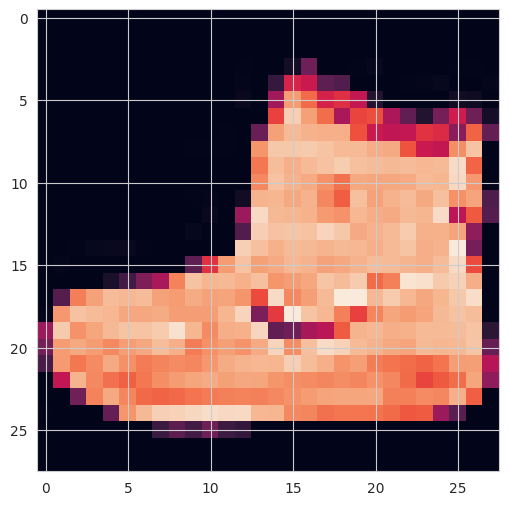

In [20]:
plt.imshow(x_train[0])


**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [21]:
x_train.shape

(60000, 28, 28)

In [22]:
x_train.reshape(60000, 28, 28, 1).shape

(60000, 28, 28, 1)

In [23]:
x_train = x_train.reshape(x_train.shape[0],28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [24]:
x_train.shape, x_test.shape


((60000, 28, 28, 1), (10000, 28, 28, 1))

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [25]:
from tensorflow.keras.utils import to_categorical


In [26]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [27]:
y_train.shape

(60000,)

In [28]:
# Convert labels to one-hot encoding
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)
Y_train.shape

(60000, 10)

In [29]:
y_train[8]

5

In [30]:
Y_train[8]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [32]:
# Build the CNN model
model = Sequential()
model.add(Conv2D(filters=28, kernel_size=(3,3),input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2),strides=(1, 1)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [33]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2  (None, 25, 25, 28)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 17500)             0         
                                                                 
 dense (Dense)               (None, 256)               4480256   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                        

In [34]:
((3* 3 * 1) + 1) * 28


280

##  Model Training

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [35]:
# Define EarlyStopping callback
from tensorflow.keras.callbacks import EarlyStopping


In [36]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights = True)


In [37]:
# Train the model with EarlyStopping
model.fit(x_train, Y_train, batch_size=32, epochs=10, validation_data=(x_test,Y_test), callbacks=[early_stop])


Epoch 1/10
1875/1875 [==============================] - 12s 5ms/step - loss: 0.4271 - accuracy: 0.8509 - val_loss: 0.3262 - val_accuracy: 0.8864
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3060 - accuracy: 0.8914 - val_loss: 0.2925 - val_accuracy: 0.8959
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2753 - accuracy: 0.9024 - val_loss: 0.2893 - val_accuracy: 0.8948
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2575 - accuracy: 0.9084 - val_loss: 0.3080 - val_accuracy: 0.8947
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2477 - accuracy: 0.9142 - val_loss: 0.3021 - val_accuracy: 0.8961
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2393 - accuracy: 0.9155 - val_loss: 0.2864 - val_accuracy: 0.9031
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2334 - accuracy: 0.9185 - val_loss: 0.2833 - val_accuracy

In [38]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.427,0.851,0.326,0.886
1,0.306,0.891,0.292,0.896
2,0.275,0.902,0.289,0.895
3,0.257,0.908,0.308,0.895
4,0.248,0.914,0.302,0.896


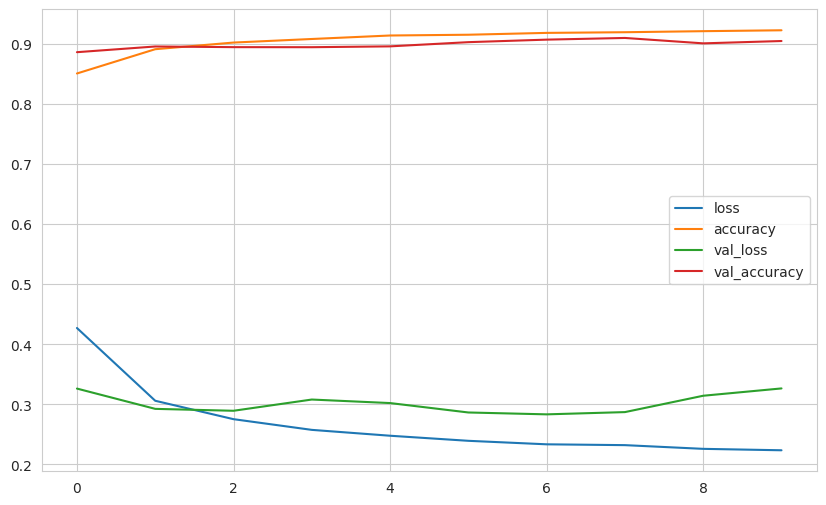

In [39]:
summary.plot();


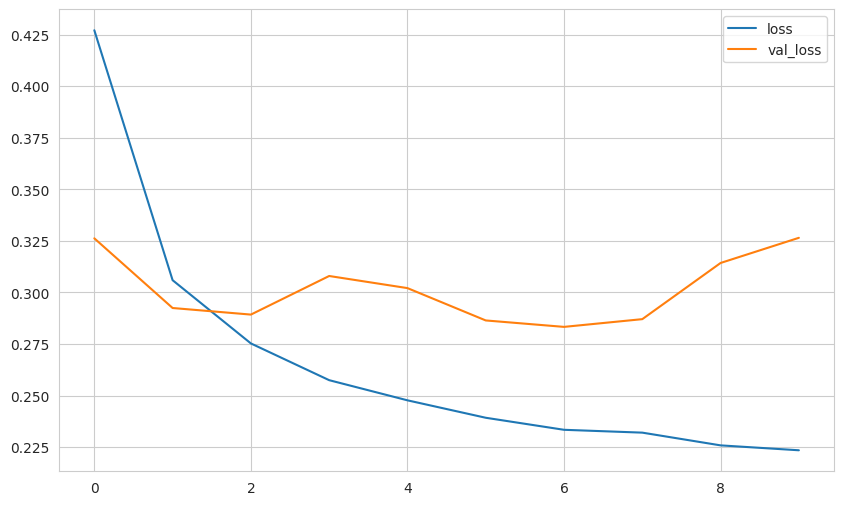

In [40]:
summary[["loss", "val_loss"]].plot();


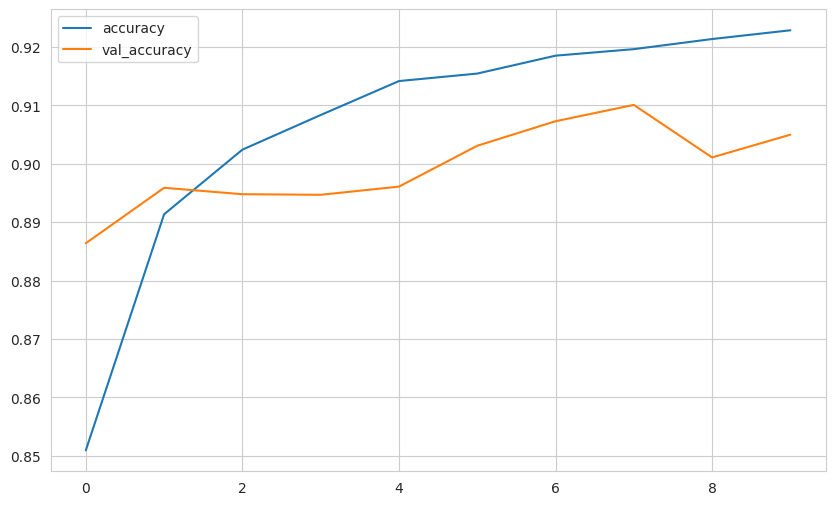

In [41]:
summary[["accuracy", "val_accuracy"]].plot();


## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [42]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import classification_report

In [43]:
# Get predictions on the test set
model.evaluate(x_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2833 - accuracy: 0.9073


[0.28332024812698364, 0.9072999954223633]

In [44]:
score = model.evaluate(x_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.28332024812698364
Test accuracy: 0.9072999954223633


In [45]:
pred_prob = model.predict(x_test)
pred_prob


313/313 [==============================] - 1s 2ms/step


array([[2.96024677e-10, 1.00999931e-10, 5.07090259e-10, ...,
        1.06149790e-04, 1.02503371e-07, 9.99893427e-01],
       [8.69623429e-10, 2.29736011e-22, 1.00000000e+00, ...,
        2.60124268e-16, 1.21922386e-17, 1.62304165e-16],
       [3.03028887e-11, 1.00000000e+00, 9.53992947e-14, ...,
        3.47598469e-12, 2.35573128e-12, 4.61025478e-13],
       ...,
       [6.29590943e-13, 1.42394428e-17, 3.33236260e-12, ...,
        8.22318450e-13, 1.00000000e+00, 3.44941231e-17],
       [1.82083515e-10, 1.00000000e+00, 1.05236471e-13, ...,
        5.10326746e-11, 6.90762497e-13, 4.10068472e-11],
       [1.94206310e-03, 2.35311218e-05, 1.24787539e-03, ...,
        3.56823385e-01, 3.03937085e-02, 5.10394089e-02]], dtype=float32)

In [46]:
pred_prob.shape


(10000, 10)

In [47]:
pred_prob[0]


array([2.9602468e-10, 1.0099993e-10, 5.0709026e-10, 5.8970778e-10,
       5.7269928e-10, 2.6712902e-07, 4.6024504e-11, 1.0614979e-04,
       1.0250337e-07, 9.9989343e-01], dtype=float32)

In [48]:
np.argmax(pred_prob[0])


9

In [49]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [50]:
y_pred.shape


(10000,)

In [51]:
# Print the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1000
           1       0.99      0.98      0.98      1000
           2       0.84      0.86      0.85      1000
           3       0.90      0.92      0.91      1000
           4       0.83      0.86      0.84      1000
           5       0.99      0.96      0.98      1000
           6       0.76      0.73      0.75      1000
           7       0.95      0.97      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.95      0.97      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [52]:
print(confusion_matrix(y_test, y_pred))


[[838   1  13  20   7   1 116   0   4   0]
 [  1 979   2  13   1   0   2   0   2   0]
 [ 13   0 861   7  69   0  50   0   0   0]
 [ 12   6   8 917  24   0  32   0   1   0]
 [  1   1  79  27 857   0  34   0   1   0]
 [  0   0   0   1   0 961   0  23   0  15]
 [ 86   0  65  31  75   0 735   0   8   0]
 [  0   0   0   0   0   1   0 968   0  31]
 [  2   2   1   3   2   1   3   1 985   0]
 [  1   0   0   0   0   3   0  24   0 972]]


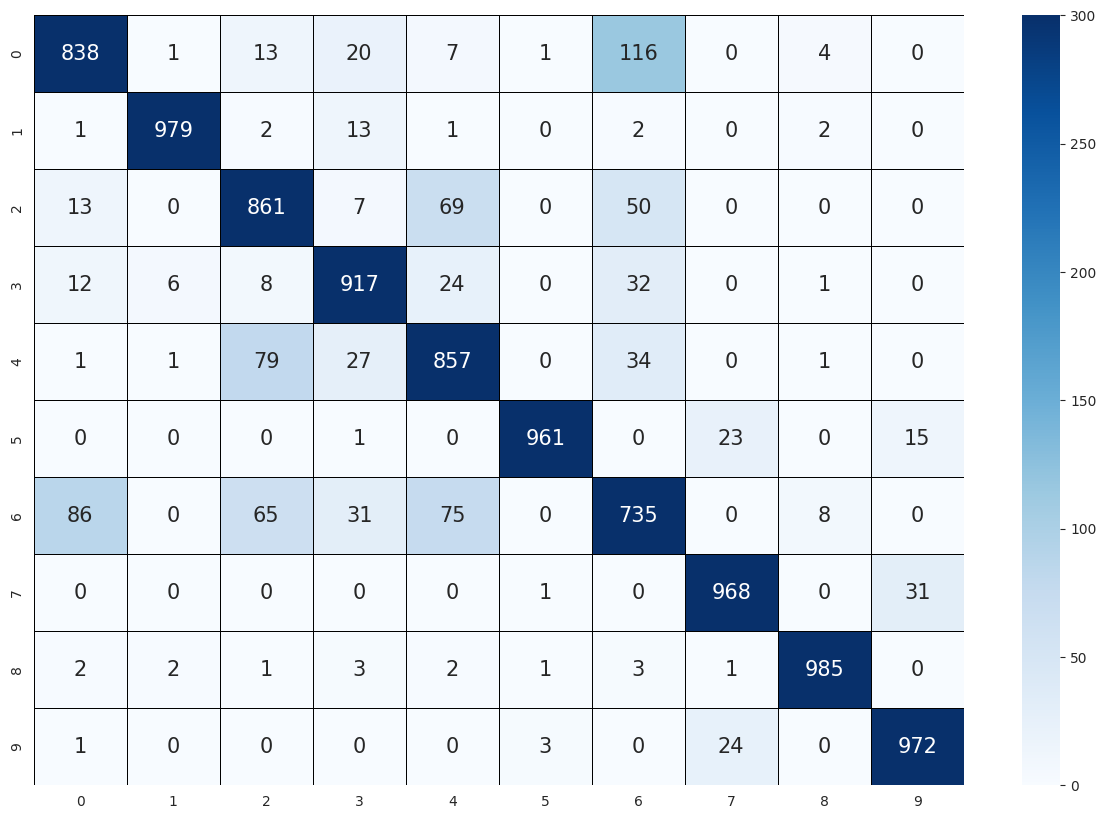

In [53]:
plt.figure(figsize=(15, 10))
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    cmap="Blues",
    linewidths=0.5,
    linecolor="black",
    fmt="g",
    annot_kws={"size": 15},
    vmax=300,
)
plt.show()

In [54]:
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

## Prediction

In [55]:
samples=[x_test[0], x_test[1], x_test[2]]


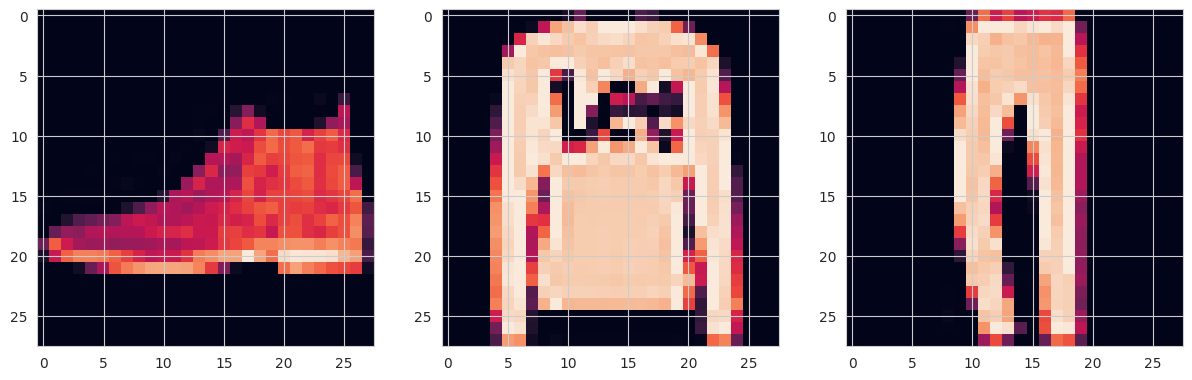

In [56]:
plt.figure(figsize = (20,5))
index=1
for i in samples:
    plt.subplot(1,4,index)
    plt.imshow(i.reshape(28,28))
    index += 1

In [57]:
samples = np.array(samples)
samples

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [58]:
samples.shape


(3, 28, 28, 1)

In [59]:
pred_prob = model.predict(samples)
pred_prob

1/1 [==============================] - 0s 46ms/step


array([[2.96024677e-10, 1.01000125e-10, 5.07090259e-10, 5.89708893e-10,
        5.72699277e-10, 2.67129508e-07, 4.60244134e-11, 1.06149790e-04,
        1.02503371e-07, 9.99893427e-01],
       [8.69621763e-10, 2.29736011e-22, 1.00000000e+00, 3.10622466e-14,
        6.39157130e-12, 3.23494112e-16, 8.65989398e-12, 2.60124268e-16,
        1.21922386e-17, 1.62304801e-16],
       [3.03028887e-11, 1.00000000e+00, 9.53989221e-14, 2.13927921e-12,
        5.06965563e-13, 9.44106772e-12, 2.16145081e-13, 3.47598469e-12,
        2.35572239e-12, 4.61025478e-13]], dtype=float32)

In [60]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([9, 2, 1])

In [61]:
y_test[:3]

array([9, 2, 1], dtype=uint8)

In [62]:
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [63]:
# Display the predicted class label
for i in y_test[:3]:
    print(classes[i])

Ankle boot
Pullover
Trouser


# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___